In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Directory containing the CSV files
input_dir = 'Data/new_data'

# List of CSV files
csv_files = [
    'Connecticut_properties.csv',
    'Maine_properties.csv',
    'Massachusetts_properties.csv',
    'New Hampshire_properties.csv',
    'New Jersey_properties.csv',
    'New York_properties.csv',
    'Pennsylvania_properties.csv',
    'Puerto Rico_properties.csv',
    'Rhode Island_properties.csv',
    'Vermont_properties.csv'
]

# Function to load CSV data into a DataFrame and concatenate
def load_and_concat_csv(files):
    dfs = []
    for file in files:
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


# Load and concatenate all CSV data into a single DataFrame
combined_df = load_and_concat_csv(csv_files)

In [3]:
combined_df.head()

,ID,bed,bath,acre_lot,city,state,zip_code,house_size,price,sold_previously,latitude,longitude
0,Conne1,3.0,1.0,3.93,Willington,Connecticut,6279.0,1572.0,225000.0,0,41.88959,-72.25933
1,Conne2,4.0,3.0,2.34,Coventry,Connecticut,6238.0,3320.0,579900.0,1,41.78281,-72.33941
2,Conne3,2.0,1.0,0.91,East Windsor,Connecticut,6016.0,960.0,215000.0,1,41.90417,-72.54438
3,Conne4,2.0,1.0,0.36,Vernon,Connecticut,6066.0,860.0,144900.0,1,41.83641,-72.46063
4,Conne5,3.0,2.0,0.19,Manchester,Connecticut,6040.0,1280.0,174900.0,0,41.76160,-72.52247


In [4]:
# Get unique states from the dataset
unique_states = combined_df['state'].unique()
unique_states

array(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
       'New Jersey', 'New York', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'Vermont'], dtype=object)

In [5]:
combined_df['state'].value_counts()

state
Massachusetts    102572
New Jersey        74503
Connecticut       67445
New York          46155
Rhode Island      24489
New Hampshire     24301
Maine             22245
Vermont           20526
Puerto Rico       15042
Pennsylvania      13746
Name: count, dtype: int64

In [6]:
combined_df.isnull().sum()

ID                 0
bed                0
bath               0
acre_lot           0
city               0
state              0
zip_code           0
house_size         0
price              0
sold_previously    0
latitude           0
longitude          0
dtype: int64

In [7]:
combined_df.describe()

,bed,bath,acre_lot,zip_code,house_size,price,sold_previously,latitude,longitude
count,411024.000000,411024.000000,411024.000000,411024.000000,411024.00000,4.110240e+05,411024.000000,411024.000000,411024.000000
mean,3.717274,2.605999,0.892503,5777.247922,2329.64503,7.039050e+05,0.552578,40.914316,-72.406347
std,1.832789,1.482209,1.911606,4008.701629,1920.60260,9.096206e+05,0.497228,4.584417,1.957462
min,1.000000,1.000000,0.010000,601.000000,104.00000,2.475000e+03,0.000000,17.988920,-121.400790
25%,3.000000,2.000000,0.110000,2474.000000,1326.00000,2.795000e+05,0.000000,40.676830,-73.982430
50%,3.000000,2.000000,0.250000,5764.000000,1878.00000,4.499000e+05,1.000000,41.747170,-72.565380
75%,4.000000,3.000000,0.750000,8055.000000,2749.00000,7.500000e+05,1.000000,42.384820,-71.252610
max,24.000000,20.000000,17.320000,95652.000000,33968.00000,1.160000e+07,1.000000,47.330540,-65.286180


In [8]:
#file_path = 'Data/new_data/Combined/combined.csv'
#combined_df.to_csv(file_path, index=False)

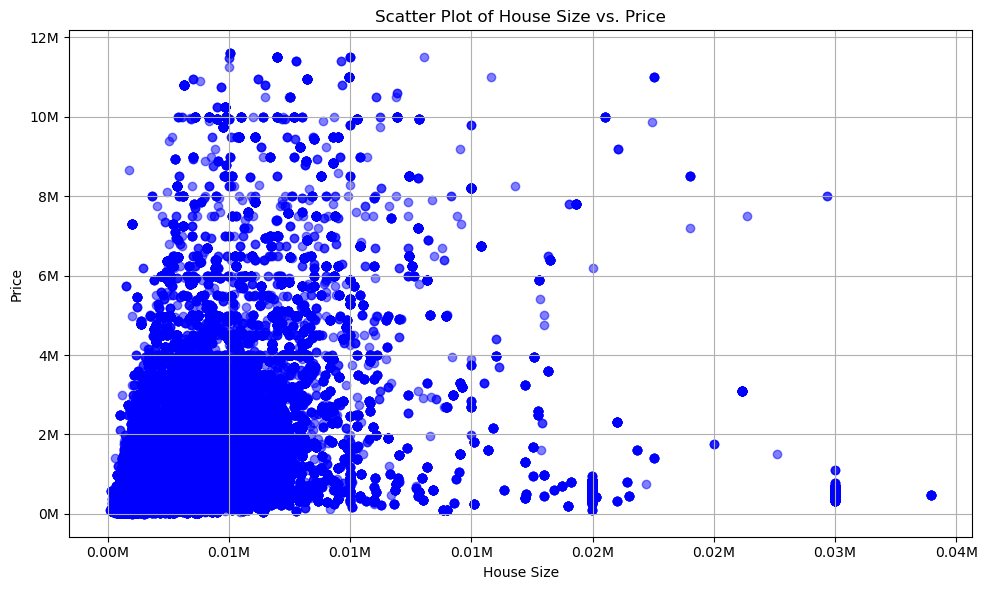

In [9]:
# Scatter plot of house size vs. price
plt.figure(figsize=(10, 6))

# Convert x-axis and y-axis values to millions
x_values_millions = combined_df['house_size'] / 1e6
y_values_millions = combined_df['price'] / 1e6

plt.scatter(x_values_millions, y_values_millions, color='b', alpha=0.5)
plt.title('Scatter Plot of House Size vs. Price')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.grid(True)

# Format x-axis labels in millions with 2 decimal points
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.2f}M'.format(x)))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.0f}M'.format(y)))

plt.tight_layout()
plt.savefig('Data/EDA_Images/scatter_plothouse_size_vs_price.png')
plt.show()

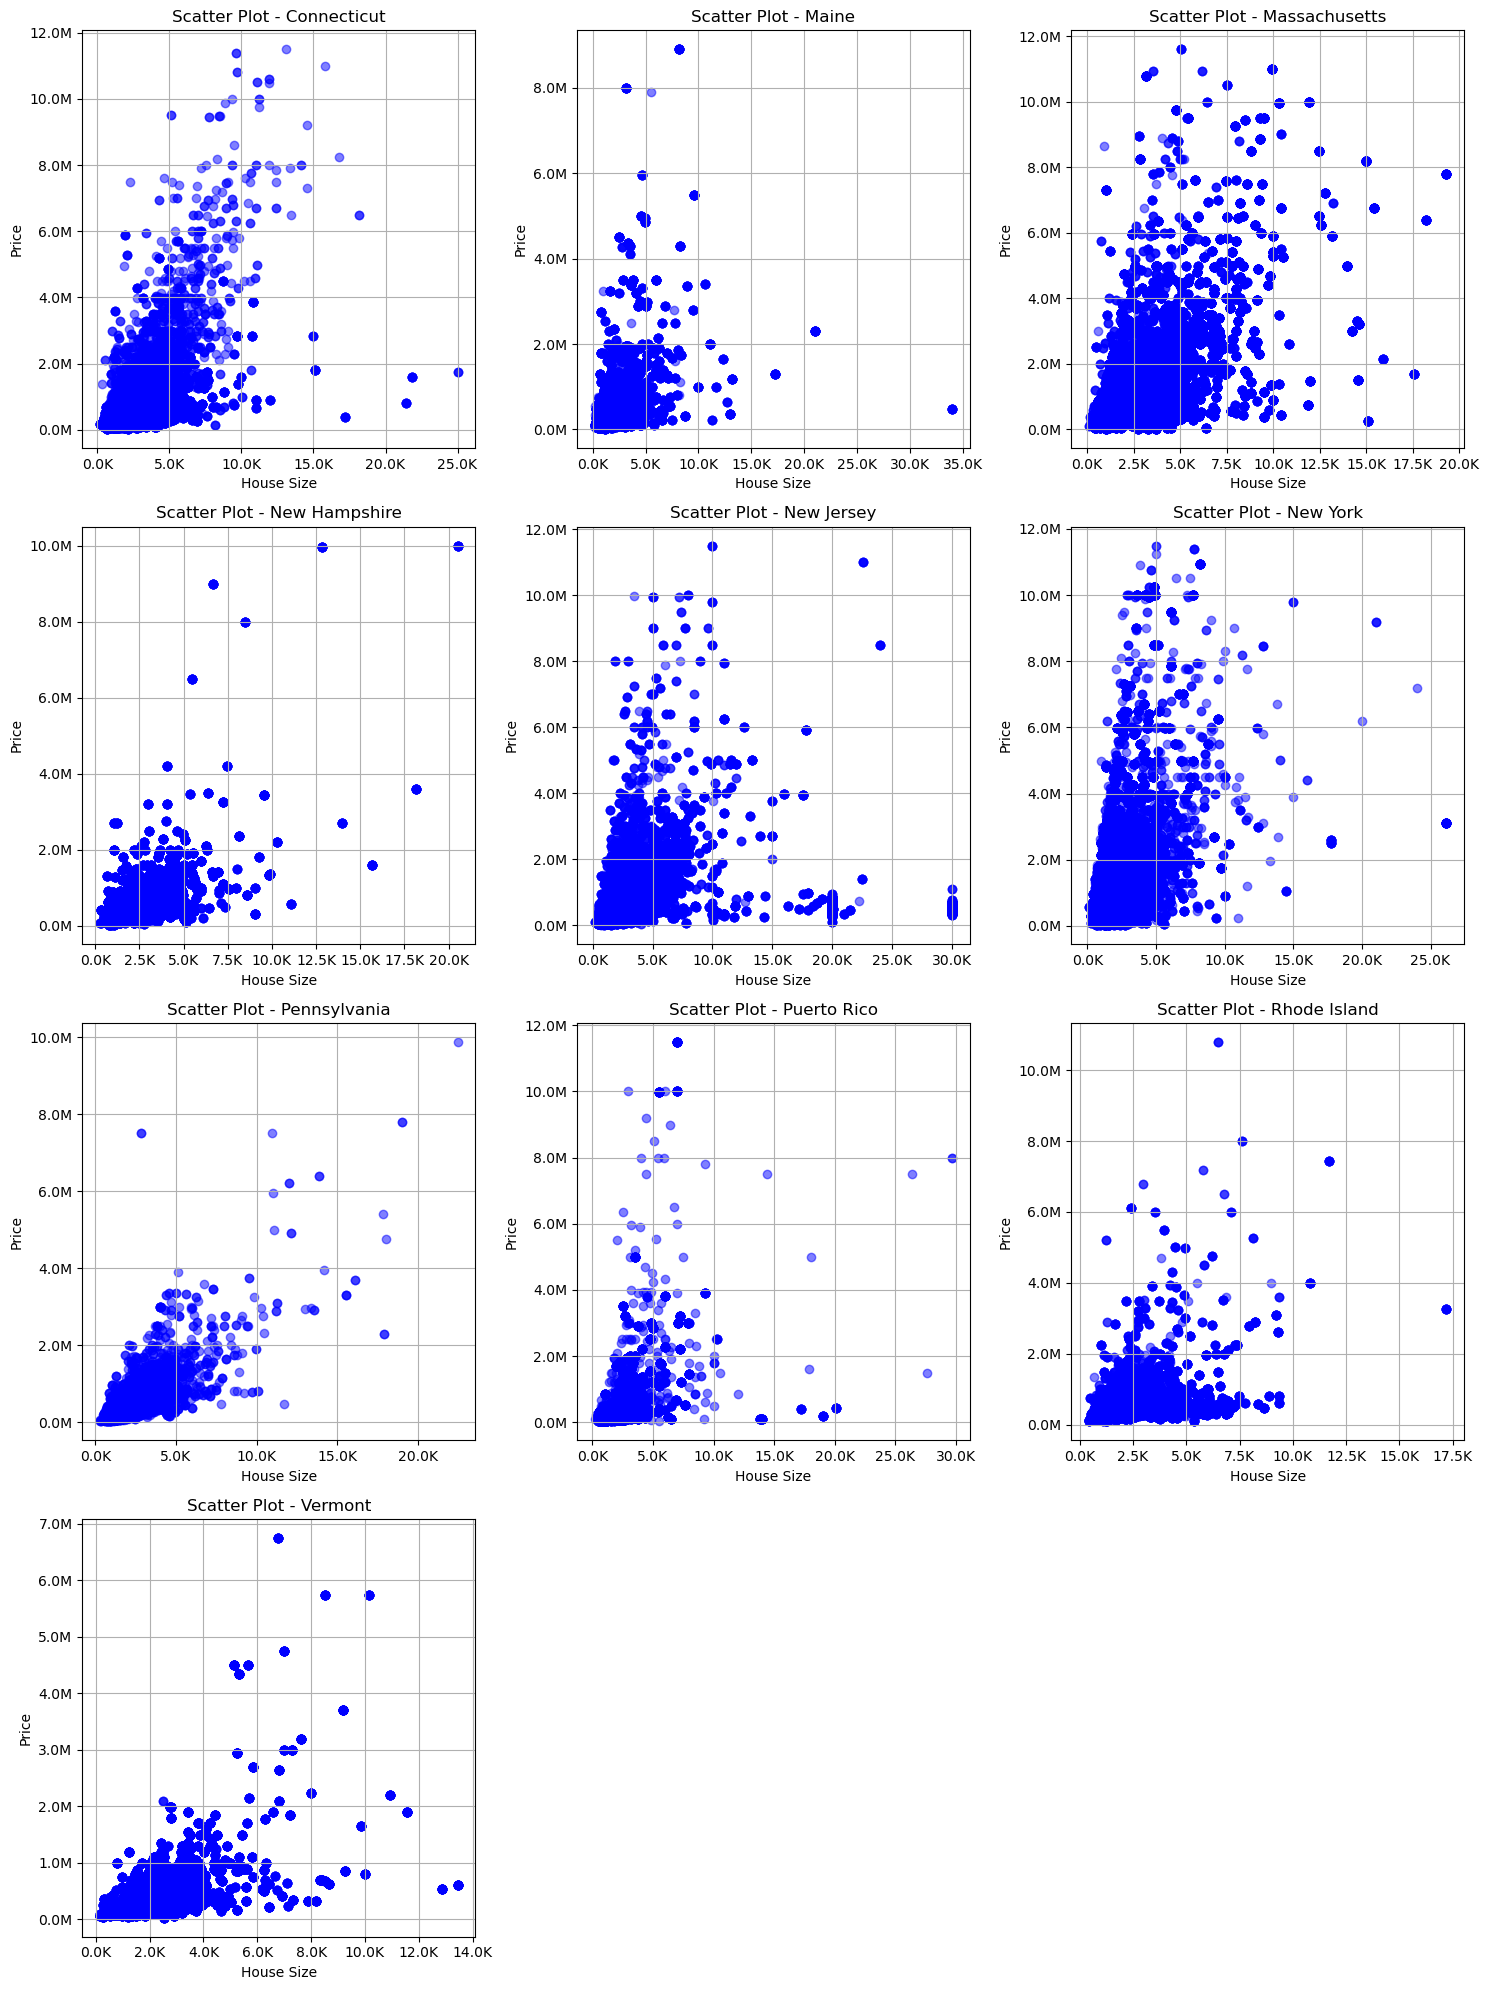

In [10]:
# Calculate the number of rows and columns for the grid layout
num_states = len(unique_states)
num_cols = 3  # Number of scatter plots per row
num_rows = (num_states + num_cols - 1) // num_cols

# Create a grid of scatter plots for each state with adjusted layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    # Convert house size and price to thousands and millions respectively with 1 decimal point
    x_values_thousands = state_df['house_size'] / 1e3
    y_values_millions = state_df['price'] / 1e6
    axes[row, col].scatter(x_values_thousands, y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('House Size')
    axes[row, col].set_ylabel('Price')
    # Format x-axis labels in thousands with 1 decimal place
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.1f}K'.format(x)))
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.savefig('Data/EDA_Images/scatter_plots_house_size_price_grid.png')


plt.show()

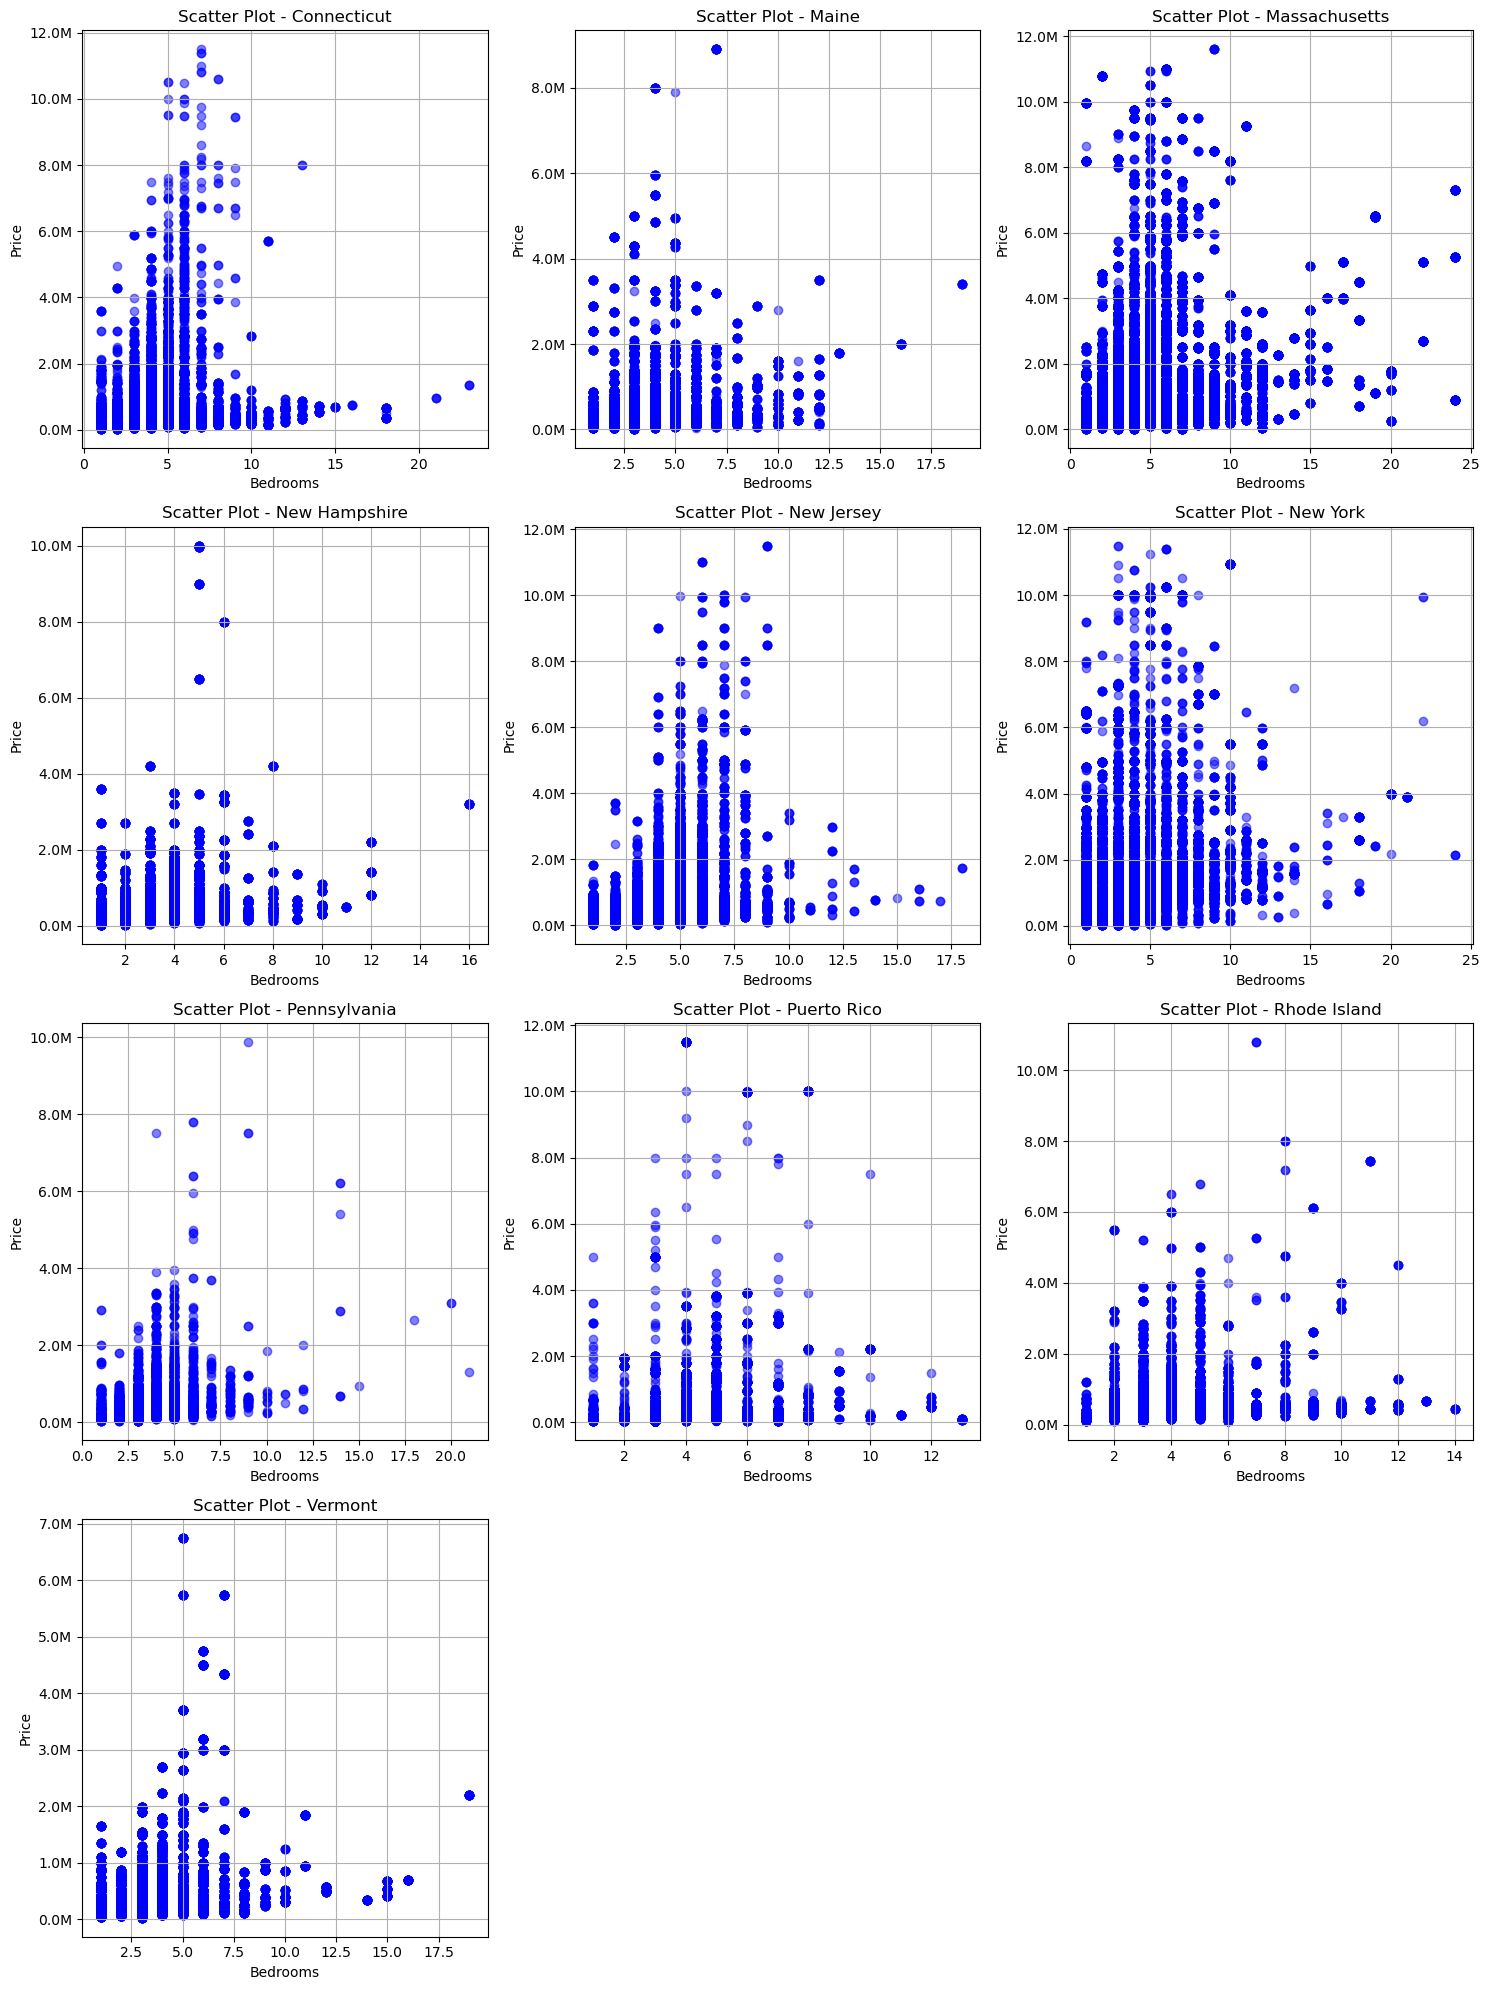

In [11]:
# Create a grid of scatter plots for 'bed' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'bed' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    # Convert price to millions with 1 decimal point
    y_values_millions = state_df['price'] / 1e6
    
    axes[row, col].scatter(state_df['bed'], y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Bedrooms')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('Data/EDA_Images/scatter_plots_house_size_bedrooms_grid.png')


plt.show()

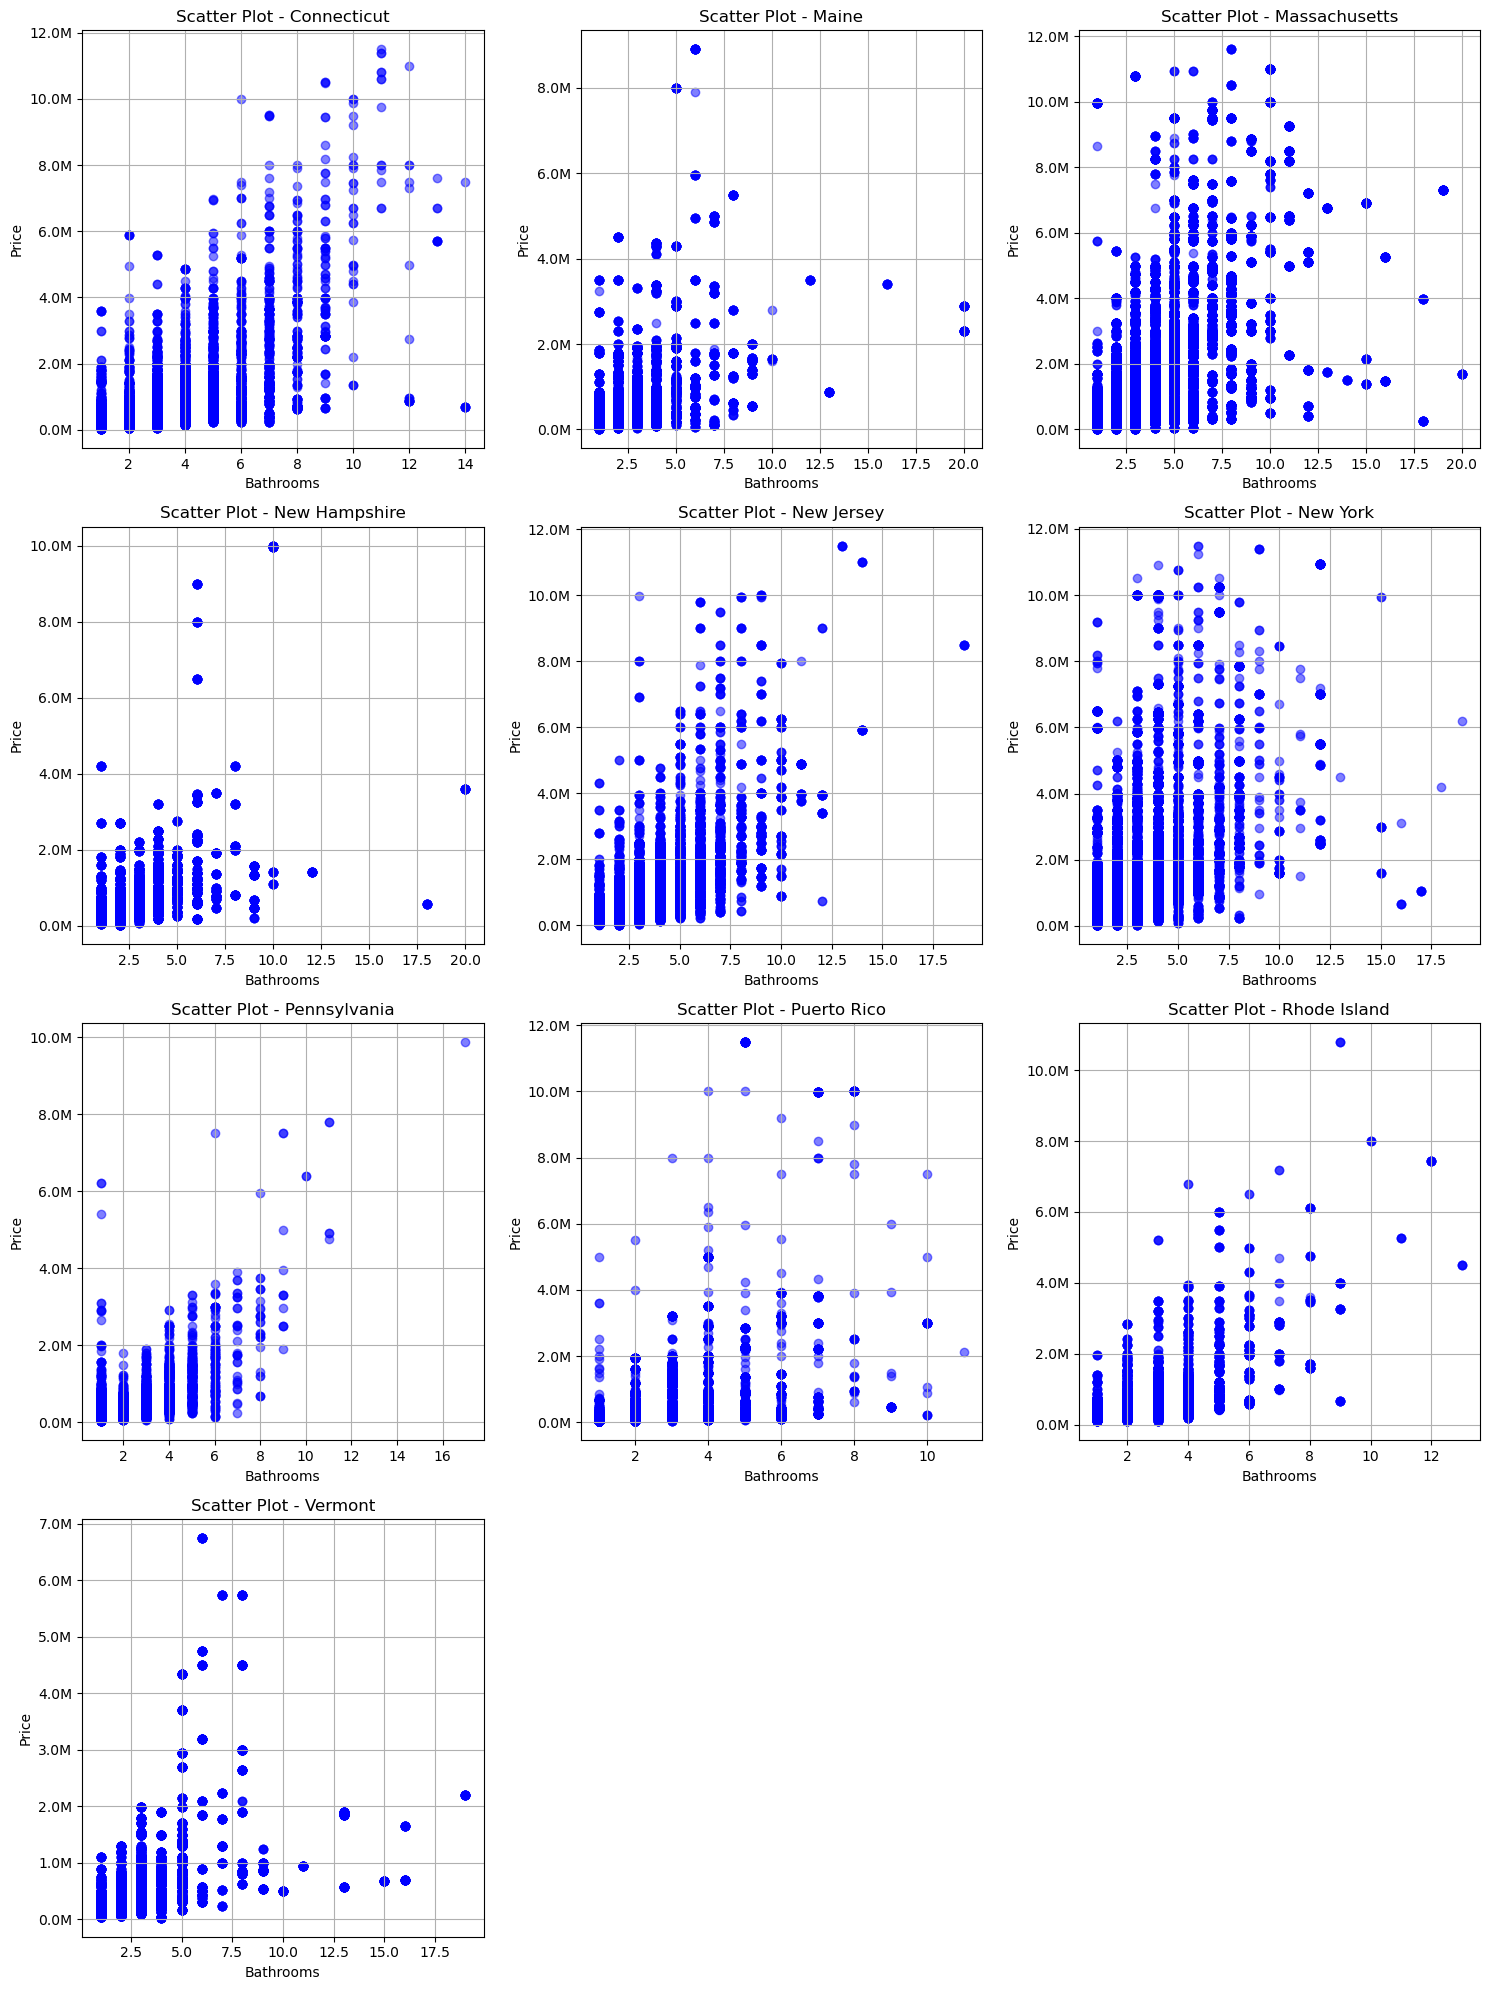

In [12]:
# Create a grid of scatter plots for 'bath' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'bath' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    # Convert price to millions with 1 decimal point
    y_values_millions = state_df['price'] / 1e6
    
    axes[row, col].scatter(state_df['bath'], y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Bathrooms')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()
plt.savefig('Data/EDA_Images/scatter_plots_house_size_bathrooms_grid.png')



plt.show()

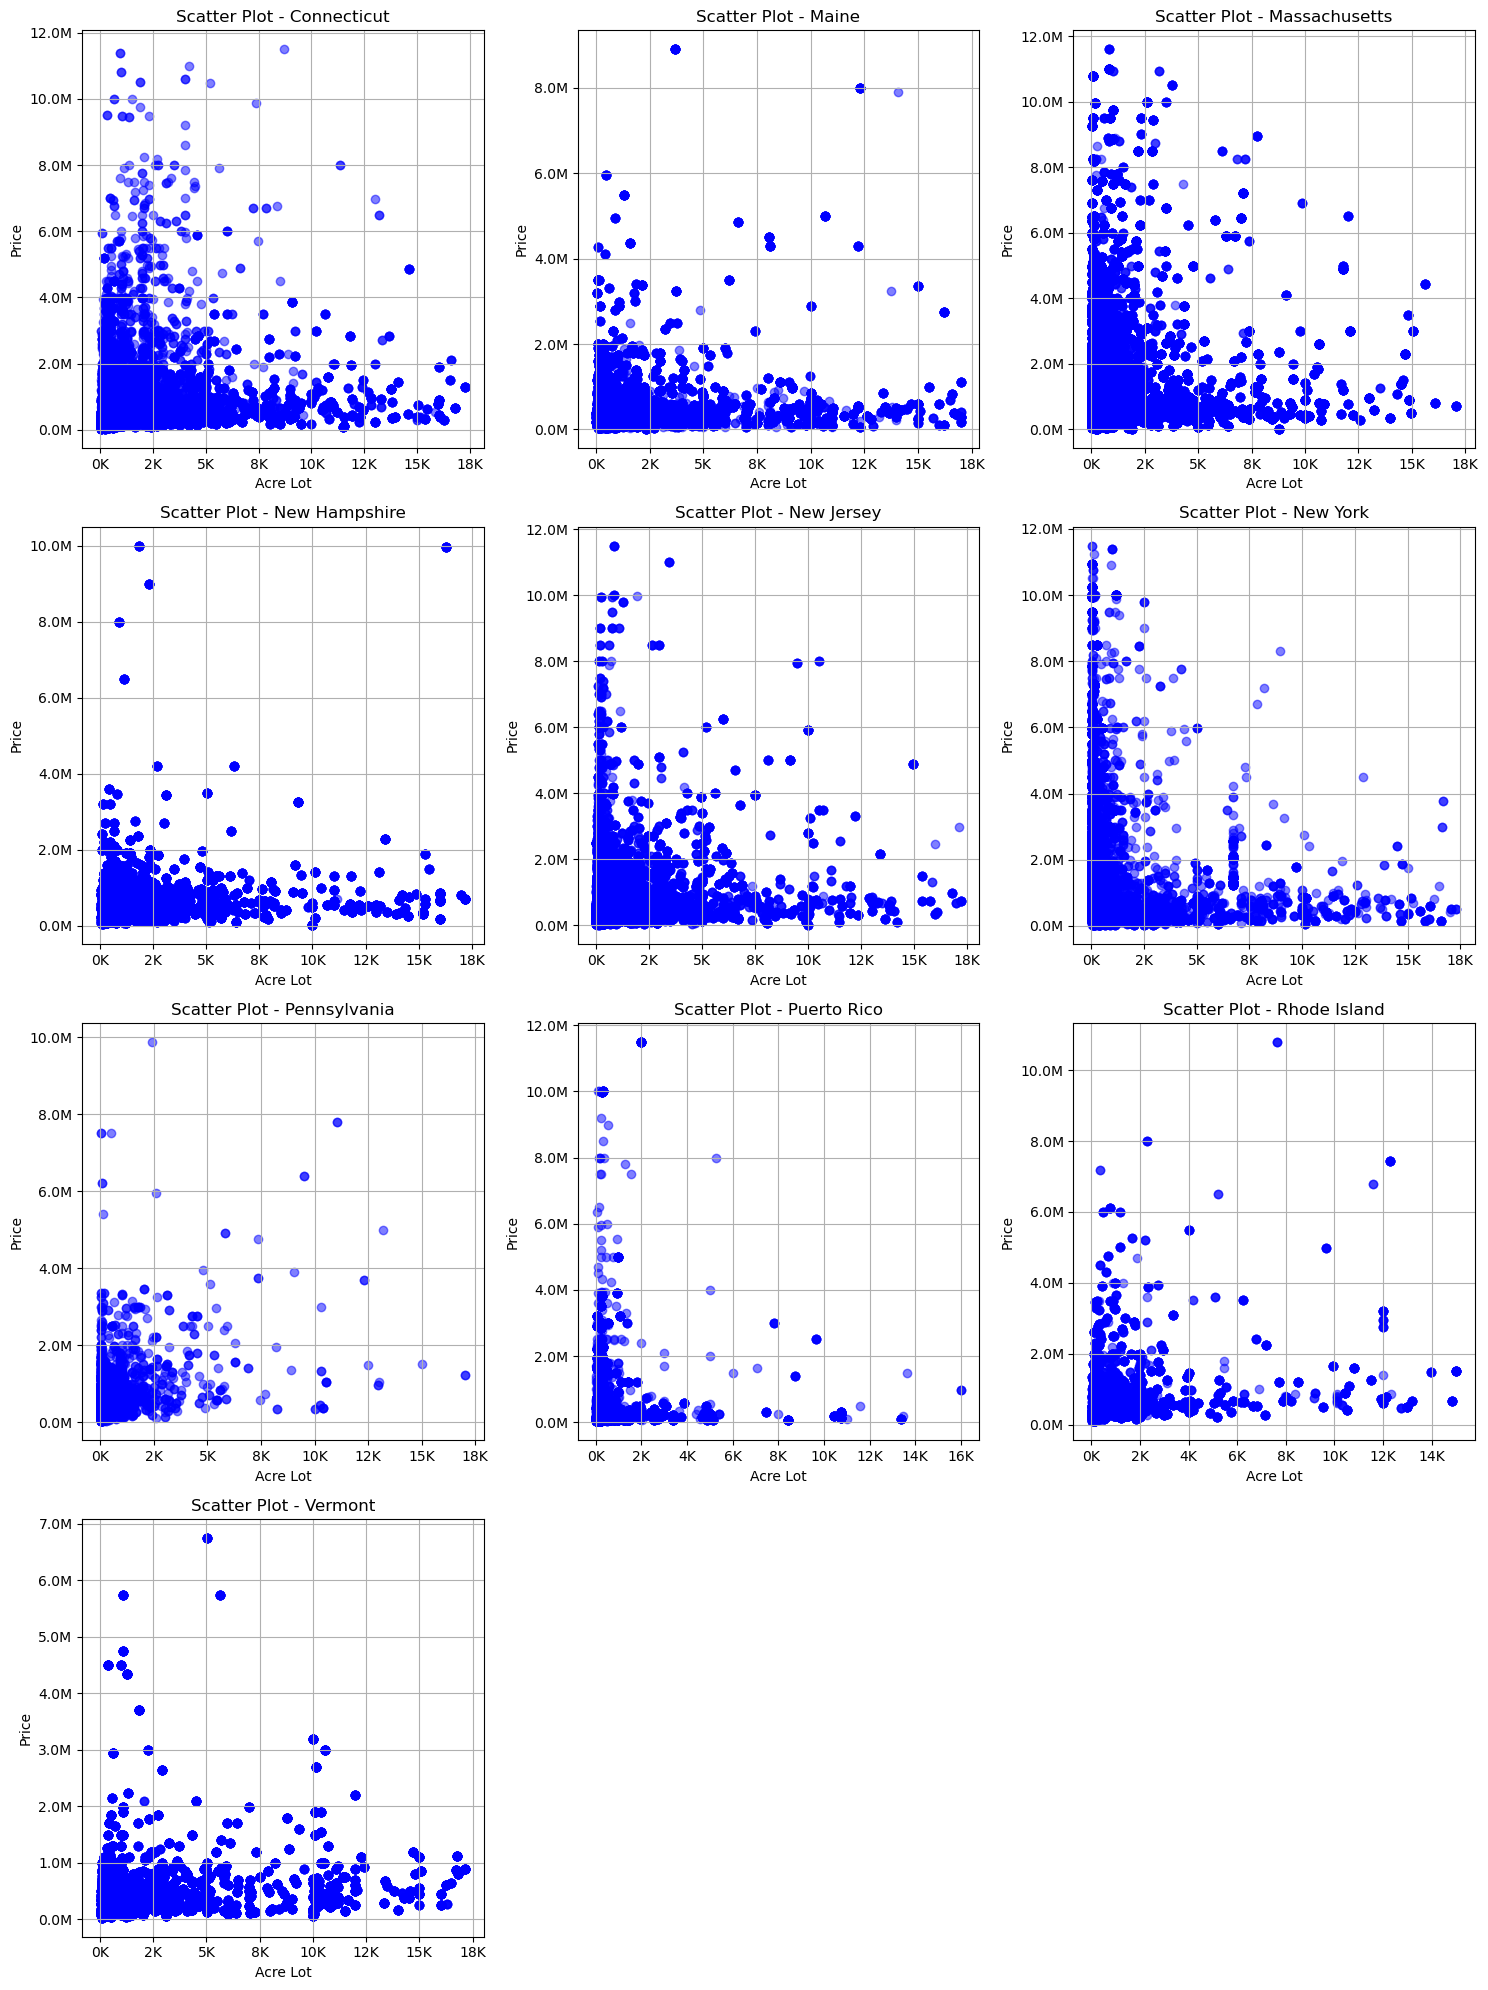

In [13]:
# Create a grid of scatter plots for each state
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'acre_lot' vs 'price' for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    axes[row, col].scatter(state_df['acre_lot'] * 1e3, state_df['price'] / 1e6, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Acre Lot')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    # Format x-axis labels in thousands
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1e3)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(len(unique_states), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('Data/EDA_Images/scatter_plots_acre_price_grid.png')

plt.show()

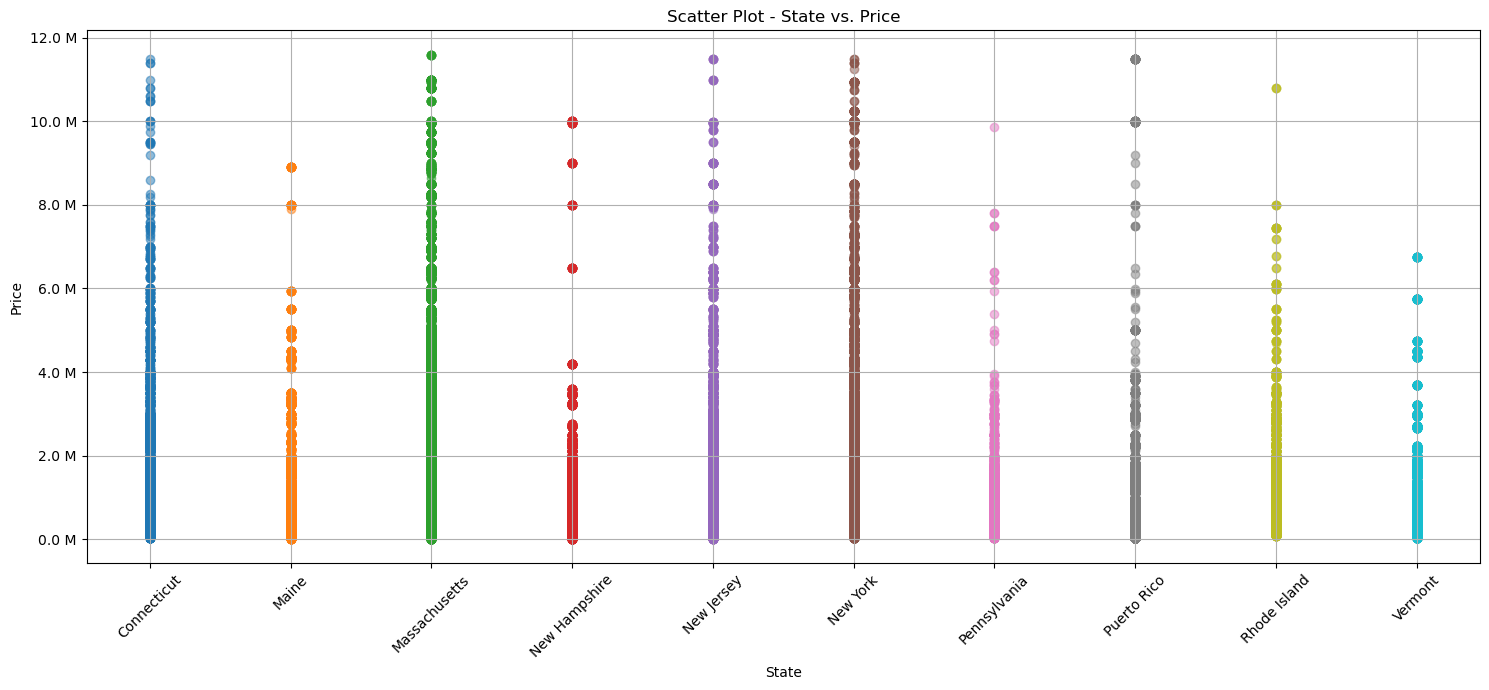

In [14]:
# Create a scatter plot for 'state' vs. 'price'
plt.figure(figsize=(15, 7))

# Iterate through unique states and plot 'state' vs. 'price' on the same plot
for state in unique_states:
    state_df = combined_df[combined_df['state'] == state]
    plt.scatter(state_df['state'], state_df['price'] / 1e6, alpha=0.5)

# Customize the plot
plt.xlabel('State')
plt.ylabel('Price')
plt.title('Scatter Plot - State vs. Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Format y-axis labels as "12.0 M"
formatter = mticker.FuncFormatter(lambda x, pos: f"{x:.1f} M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig('Data/EDA_Images/scatter_state_vs_price.png')
plt.show()

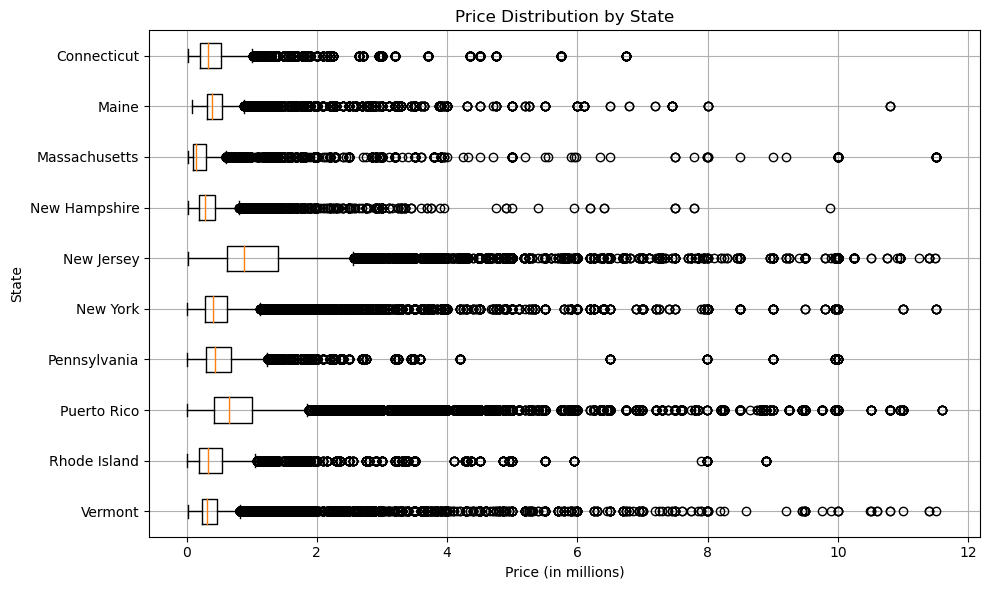

In [15]:
# Sort unique_states alphabetically
unique_states_sorted = sorted(unique_states)

# Create a box plot for all states in a single graph
plt.figure(figsize=(10, 6))

# Data for box plots
data = [combined_df[combined_df['state'] == state]['price'] / 1e6 for state in unique_states_sorted]

# Create the box plot
plt.boxplot(data, vert=False, labels=unique_states_sorted[::-1])  # Reverse the labels list

plt.title('Price Distribution by State')
plt.xlabel('Price (in millions)')
plt.ylabel('State')
plt.grid(True)
plt.tight_layout()
plt.savefig('Data/EDA_Images/box_plots_pricebystate_grid.png')
plt.show()

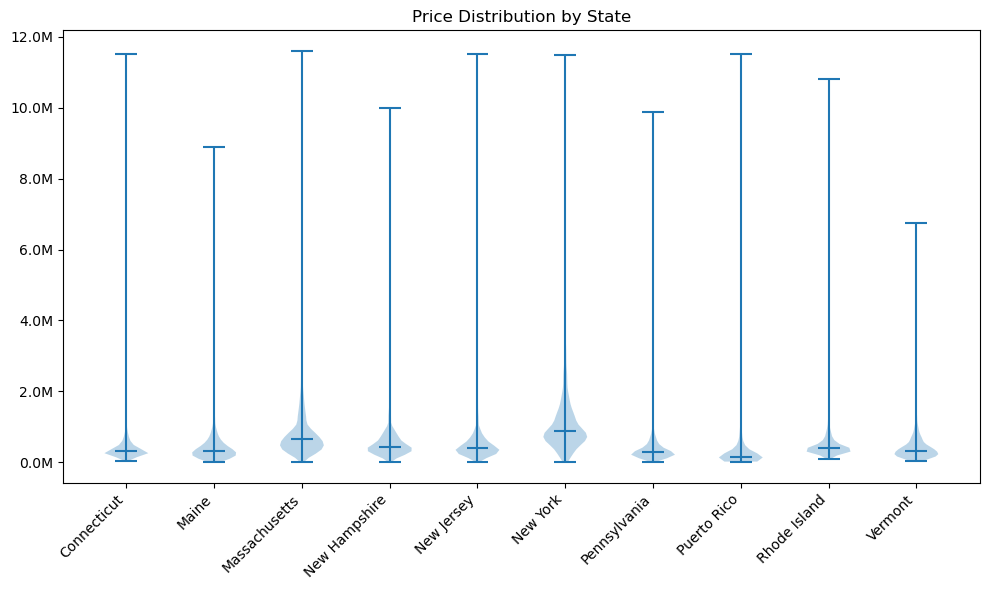

In [17]:
plt.figure(figsize=(10, 6))

# Create a violin plot
violin = plt.violinplot(dataset=[combined_df[combined_df['state'] == state]['price'] for state in unique_states],
                        showmedians=True)

# Format y-axis labels in millions with 1 decimal point
formatter = mticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6))
plt.gca().yaxis.set_major_formatter(formatter)

# Set x-axis labels and rotate them vertically
plt.xticks(range(1, len(unique_states) + 1), unique_states, 
           rotation=45,
            ha='right')

plt.title('Price Distribution by State')
plt.tight_layout()

plt.savefig('Data/EDA_Images/violin_pricebystate.png')
plt.show()

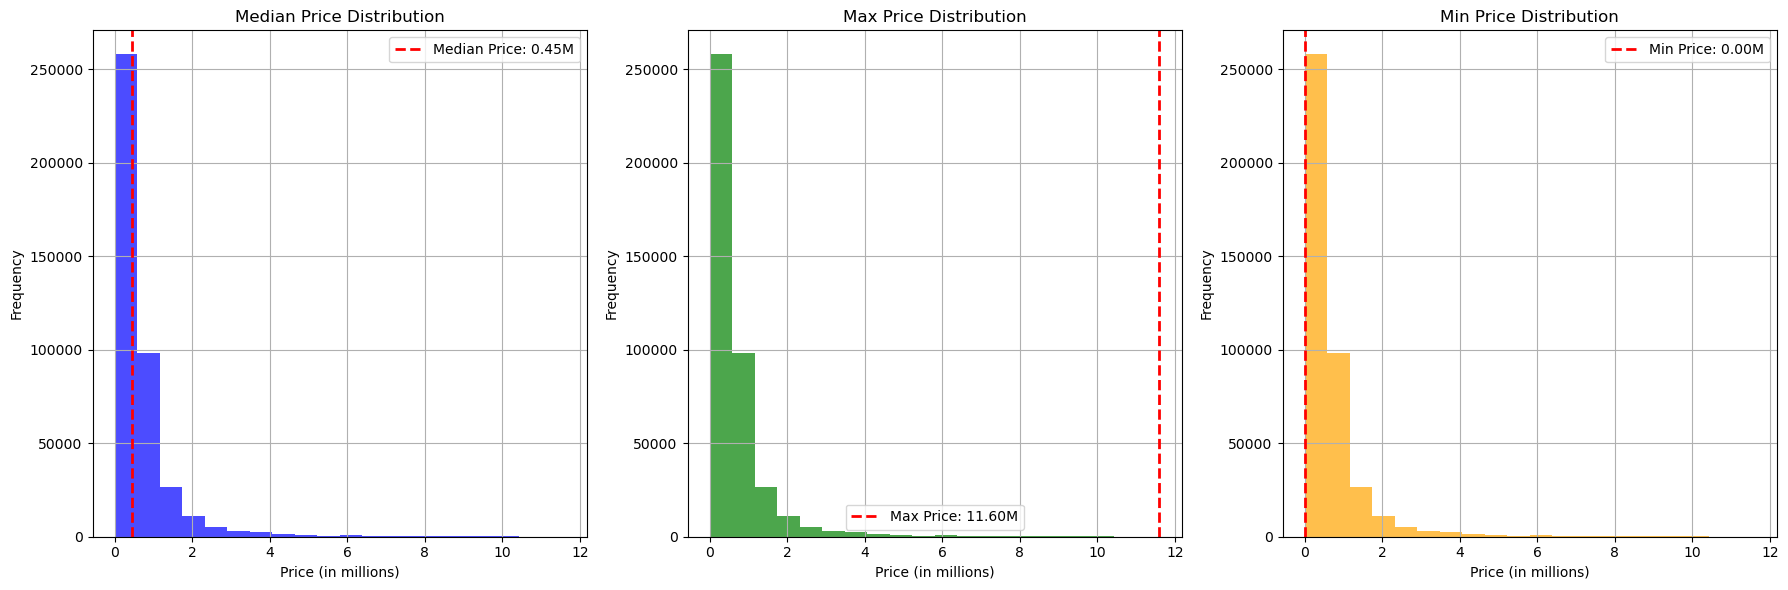

In [45]:
# Calculate statistics
median_price = combined_df['price'].median()
max_price = combined_df['price'].max()
min_price = combined_df['price'].min()

# Create histograms for median price, max price, and min price
plt.figure(figsize=(18, 6))

# Histogram for median price
plt.subplot(1, 3, 1)
plt.hist(combined_df['price'] / 1e6, bins=20, color='b', alpha=0.7)
plt.axvline(median_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Median Price: {median_price / 1e6:.2f}M')
plt.title('Median Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Histogram for max price
plt.subplot(1, 3, 2)
plt.hist(combined_df['price'] / 1e6, bins=20, color='g', alpha=0.7)
plt.axvline(max_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Max Price: {max_price / 1e6:.2f}M')
plt.title('Max Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Histogram for min price
plt.subplot(1, 3, 3)
plt.hist(combined_df['price'] / 1e6, bins=20, color='orange', alpha=0.7)
plt.axvline(min_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Min Price: {min_price / 1e6:.2f}M')
plt.title('Min Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Data/EDA_Images/bar_median_grid.png')
plt.show()

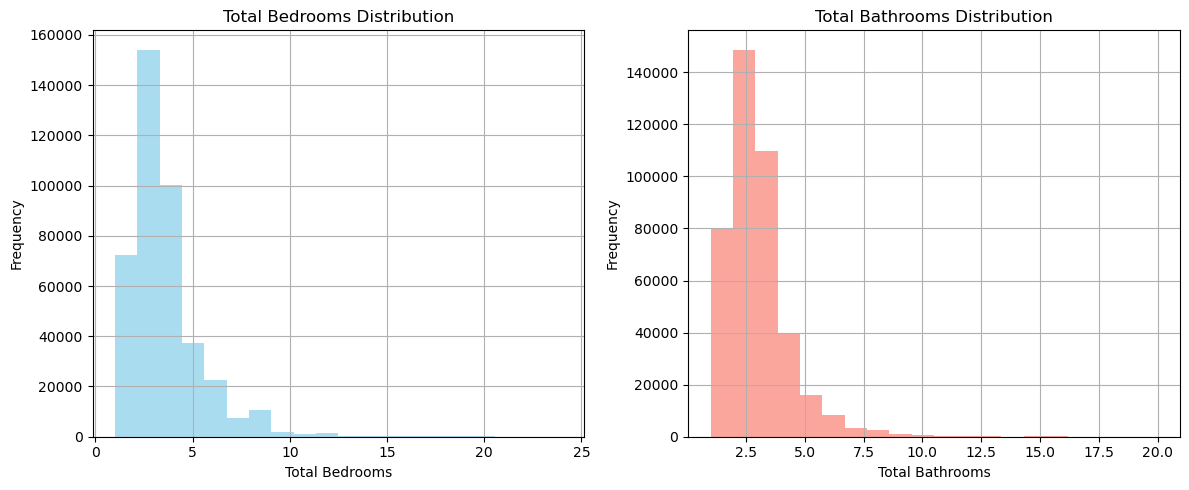

In [18]:
plt.figure(figsize=(12, 5))

# Histogram for total bedrooms
plt.subplot(1, 2, 1)
plt.hist(combined_df['bed'], bins=20, color='skyblue', alpha=0.7)
plt.title('Total Bedrooms Distribution')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for total bathrooms
plt.subplot(1, 2, 2)
plt.hist(combined_df['bath'], bins=20, color='salmon', alpha=0.7)
plt.title('Total Bathrooms Distribution')
plt.xlabel('Total Bathrooms')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.savefig('Data/EDA_Images/bar_bedbath_grid.png')
plt.show()

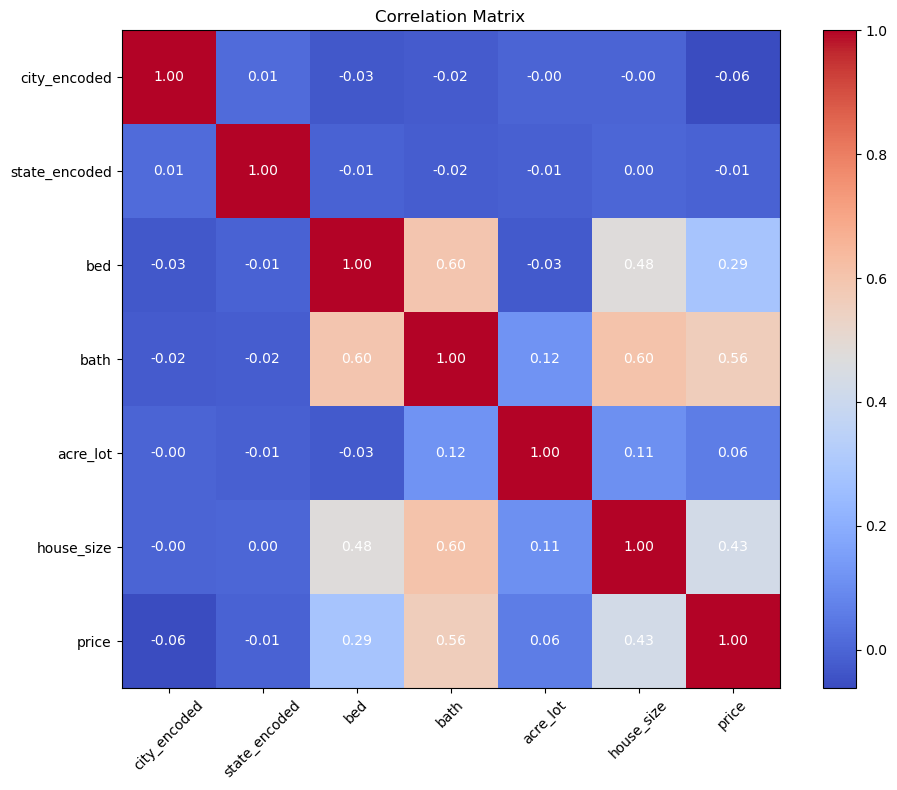

In [19]:
# Initialize LabelEncoders for ID, city, and state columns
label_encoder_id = LabelEncoder()
label_encoder_city = LabelEncoder()
label_encoder_state = LabelEncoder()

# Encode 'ID', 'city', and 'state' columns
combined_df['ID_encoded'] = label_encoder_id.fit_transform(combined_df['ID'])
combined_df['city_encoded'] = label_encoder_city.fit_transform(combined_df['city'])
combined_df['state_encoded'] = label_encoder_state.fit_transform(combined_df['state'])

# Calculate the correlation matrix
correlation_matrix = combined_df[['city_encoded', 'state_encoded', 'bed', 'bath', 'acre_lot', 'house_size', 'price']].corr()

# Plot the correlation matrix using a heatmap with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=45)
plt.yticks(tick_marks, correlation_matrix.columns)

# Display the correlation coefficients in the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.title('Correlation Matrix')
plt.colorbar()
plt.tight_layout()
plt.savefig('Data/EDA_Images/correlationmatrix.png')
plt.show()

In [20]:
# Get the correlation coefficients as text
correlation_text = correlation_matrix.to_string()

# Print or use the correlation_text as needed
print(correlation_text)

               city_encoded  state_encoded       bed      bath  acre_lot  house_size     price
city_encoded       1.000000       0.014888 -0.032361 -0.024045 -0.001810   -0.004026 -0.062563
state_encoded      0.014888       1.000000 -0.006387 -0.017573 -0.008803    0.000340 -0.008597
bed               -0.032361      -0.006387  1.000000  0.595769 -0.028225    0.476532  0.285868
bath              -0.024045      -0.017573  0.595769  1.000000  0.118551    0.603102  0.563460
acre_lot          -0.001810      -0.008803 -0.028225  0.118551  1.000000    0.110387  0.061051
house_size        -0.004026       0.000340  0.476532  0.603102  0.110387    1.000000  0.430199
price             -0.062563      -0.008597  0.285868  0.563460  0.061051    0.430199  1.000000


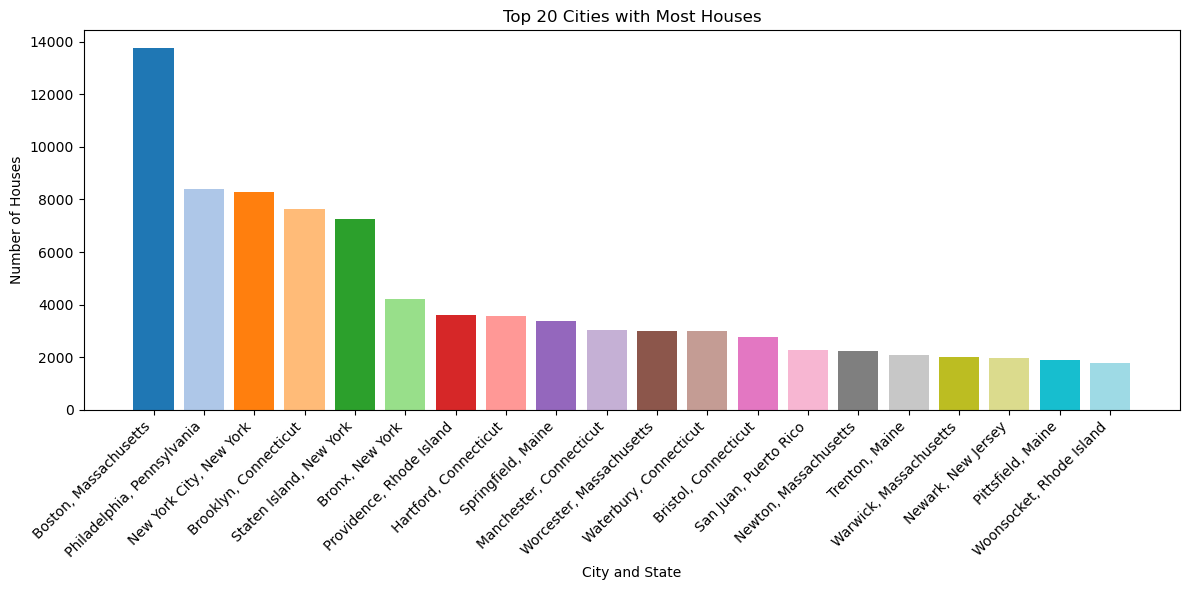

In [21]:
# Get the top 20 cities with the most houses
top_cities = combined_df['city'].value_counts().nlargest(20)

# Generate unique colors for each bar
colors = plt.cm.tab20(np.arange(len(top_cities)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities)), top_cities.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Number of Houses')
plt.title('Top 20 Cities with Most Houses')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities)), [f"{city}, {combined_df[combined_df['city'] == city]['state'].iloc[0]}" for city in top_cities.index], 
           rotation=45,
            ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citiesmosthouses.png')
plt.show()

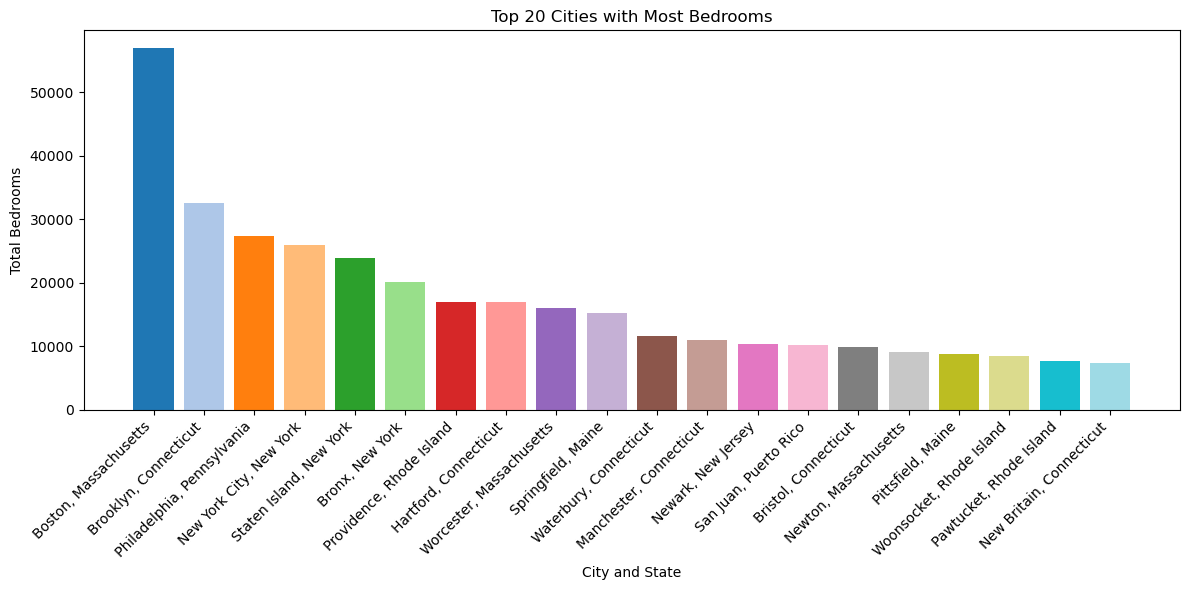

In [22]:
# Get the top 20 cities with the most bedrooms
top_cities_bedrooms = combined_df.groupby('city')['bed'].sum().nlargest(20)

# Generate unique colors for each bar
colors = plt.cm.tab20(np.arange(len(top_cities_bedrooms)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities_bedrooms)), top_cities_bedrooms.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Total Bedrooms')
plt.title('Top 20 Cities with Most Bedrooms')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities_bedrooms)), [f"{city}, {combined_df[combined_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bedrooms.index], 
           rotation=45,
            ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citiesmostbedrooms.png')
plt.show()

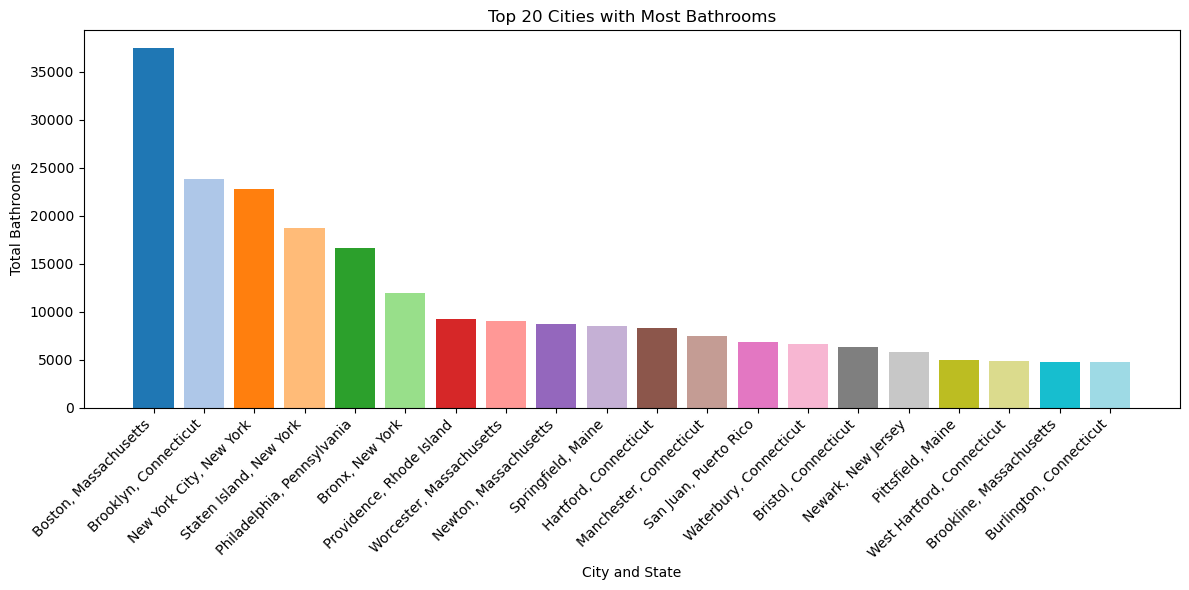

In [23]:
# Get the top 20 cities with the most bathrooms
top_cities_bathrooms = combined_df.groupby('city')['bath'].sum().nlargest(20)

# Generate unique colors for each bar
colors = plt.cm.tab20(np.arange(len(top_cities_bathrooms)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities_bathrooms)), top_cities_bathrooms.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Total Bathrooms')
plt.title('Top 20 Cities with Most Bathrooms')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities_bathrooms)), [f"{city}, {combined_df[combined_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bathrooms.index], 
           rotation=45,
            ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citiesmostbaths.png')
plt.show()

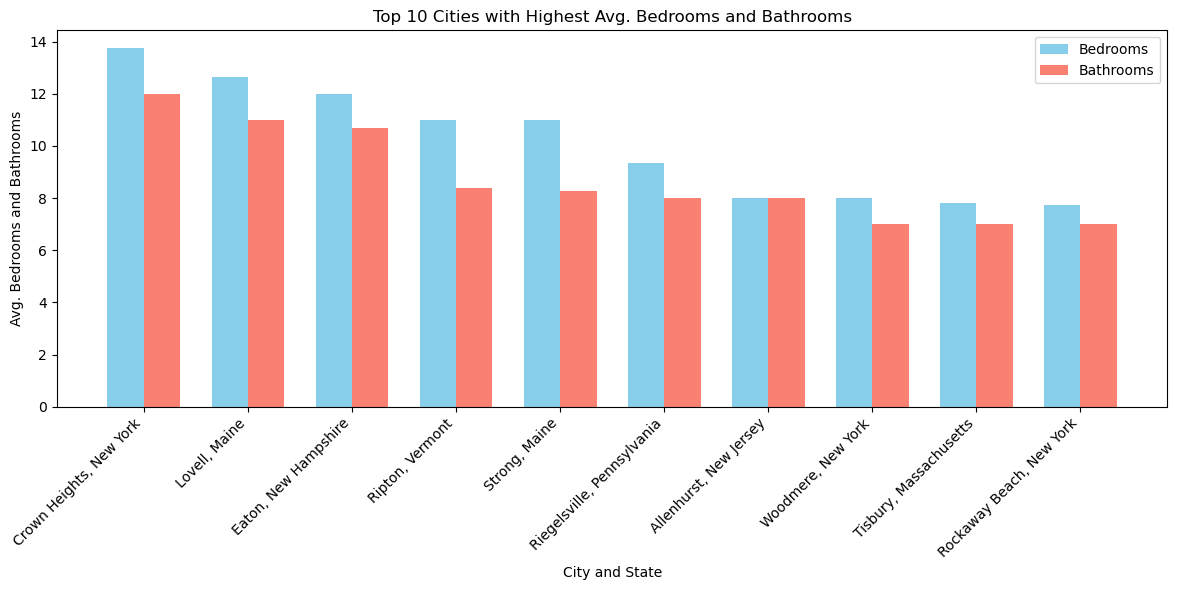

In [24]:
# Calculate the mean number of bedrooms and bathrooms for each city
city_bed_bath_mean = combined_df.groupby('city')[['bed', 'bath']].mean()

# Calculate the mean of bed and bath and sort by descending order, then select the top 10 cities
top_cities_bed_mean = city_bed_bath_mean['bed'].nlargest(10)
top_cities_bath_mean = city_bed_bath_mean['bath'].nlargest(10)

# Generate unique colors for bedrooms and bathrooms
bedroom_color = 'skyblue'
bathroom_color = 'salmon'

# Plot separate bars for mean bedrooms and bathrooms for each city
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(top_cities_bed_mean))

plt.bar(indices, top_cities_bed_mean.values, bar_width, color=bedroom_color, label='Bedrooms')
plt.bar(indices + bar_width, top_cities_bath_mean.values, bar_width, color=bathroom_color, label='Bathrooms')

plt.xlabel('City and State')
plt.ylabel('Avg. Bedrooms and Bathrooms')
plt.title('Top 10 Cities with Highest Avg. Bedrooms and Bathrooms')
plt.xticks(indices + bar_width / 2, [f"{city}, {combined_df[combined_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bed_mean.index],
           rotation=45,
            ha='right')
plt.legend()

plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop10citieshighestmeanbedsandbaths.png')
plt.show()

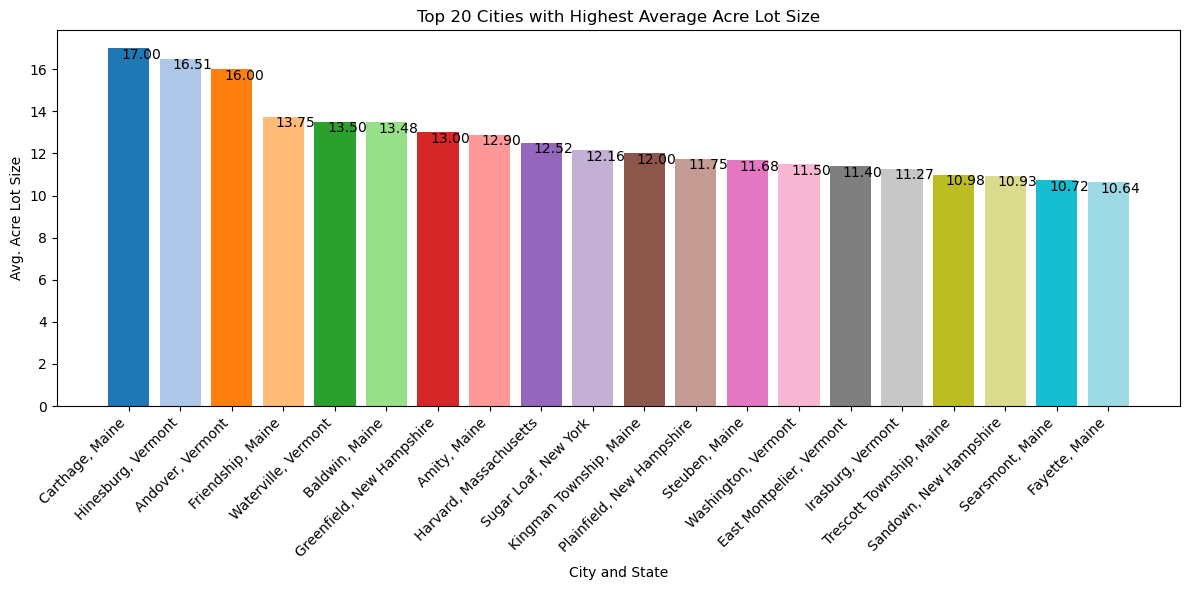

In [25]:
# Get the top 20 cities with highest mean acre lot size
top_cities_acre_lot_mean = combined_df.groupby(['city', 'state'])['acre_lot'].mean().nlargest(20)

# Extract city and state names for labeling
city_states = [f"{city}, {state}" for city, state in top_cities_acre_lot_mean.index]

# Plot bar chart for mean acre lot size for each city with city and state labels and values inside the bars
plt.figure(figsize=(12, 6))
bars = plt.bar(city_states, top_cities_acre_lot_mean.values, color=colors)

# Add labels and title
plt.xlabel('City and State')
plt.ylabel('Avg. Acre Lot Size')
plt.title('Top 20 Cities with Highest Average Acre Lot Size')

# Add values inside the bars
for bar, value in zip(bars, top_cities_acre_lot_mean.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.5, f'{value:.2f}', fontsize=10)

plt.xticks(rotation=45,
            ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citiesaveragelotsize.png')
plt.show()

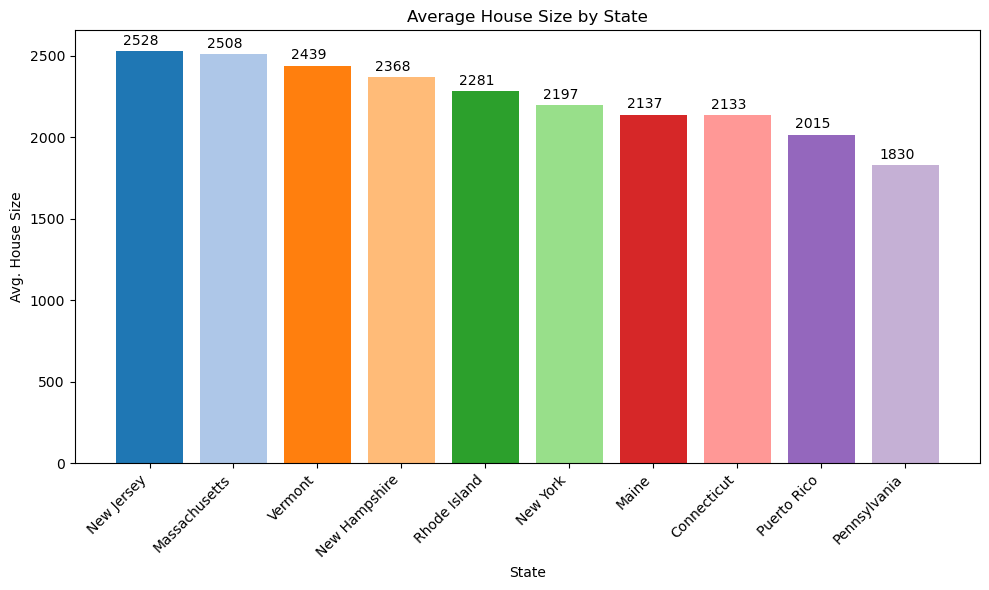

In [26]:
# Calculate average house size by state
avg_house_size_by_state = combined_df.groupby('state')['house_size'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_house_size_by_state.index, avg_house_size_by_state.values, color=colors)
plt.xlabel('State')
plt.ylabel('Avg. House Size')
plt.title('Average House Size by State')

# Add text annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 20, str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartopcitieshousesizebystate.png')
plt.show()

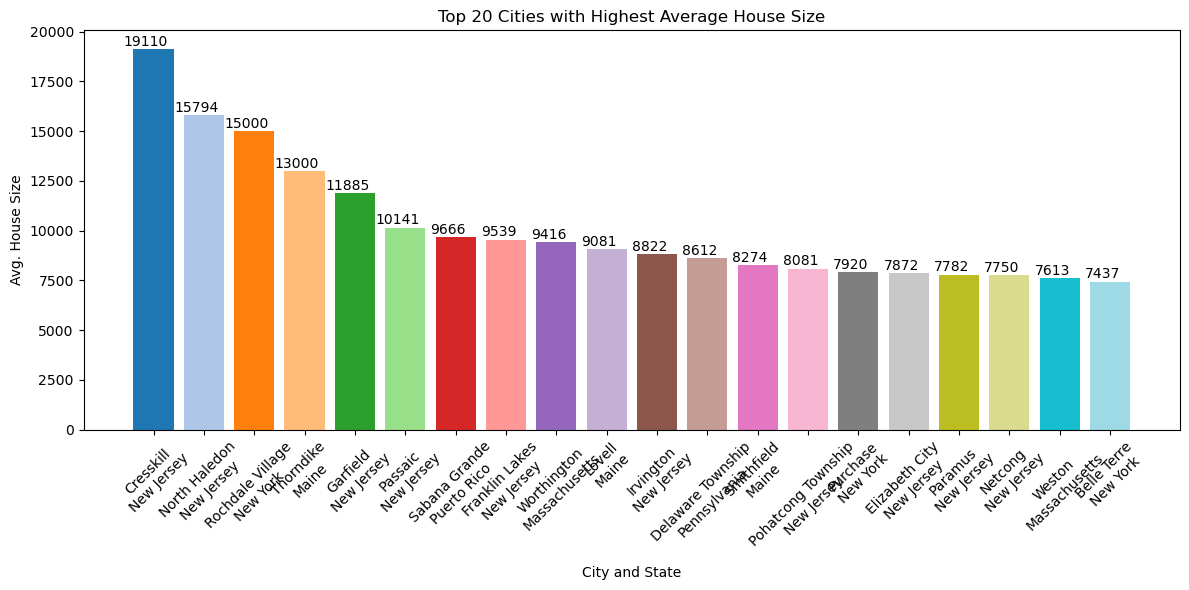

In [27]:
# Group by city and state, calculate mean house size, and sort by mean size
city_state_mean_size = combined_df.groupby(['city', 'state'])['house_size'].mean().sort_values(ascending=False)

# Select top 20 cities with highest mean house size
top_cities = city_state_mean_size.head(20)

# Plotting the bar chart with text annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(top_cities.index.map(lambda x: f"{x[0]}\n{x[1]}"), top_cities.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Avg. House Size')
plt.title('Top 20 Cities with Highest Average House Size')
plt.xticks(rotation=45, ha='center')

# Add text annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citiesaveragehousesize.png')
plt.show()

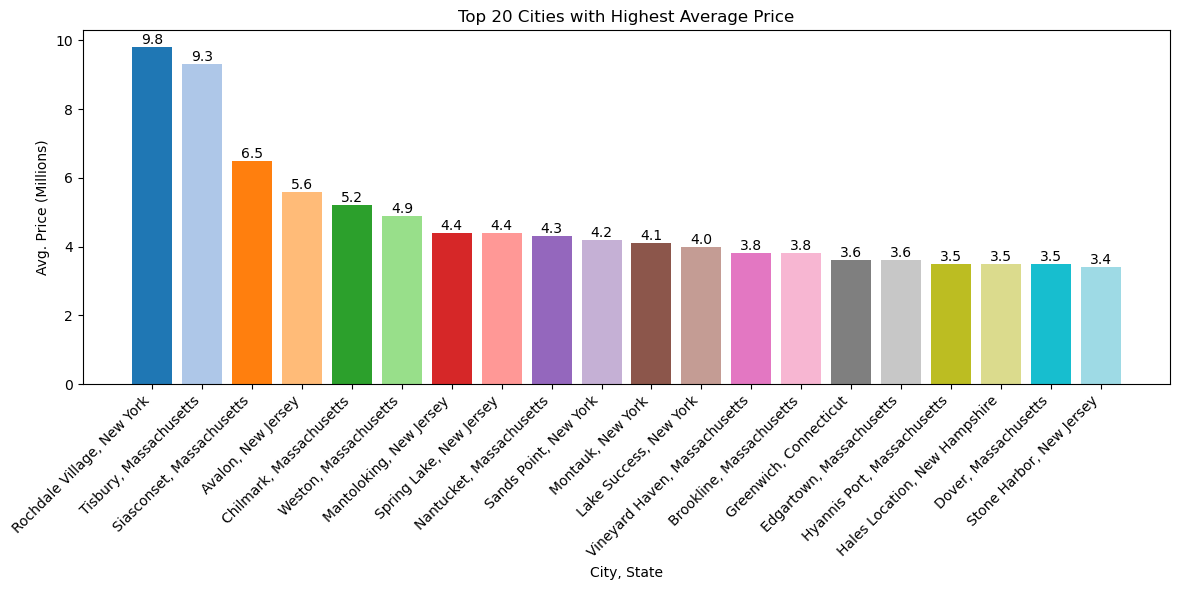

In [28]:
# Calculate average price for each city
city_avg_price = combined_df.groupby(['city', 'state'])['price'].mean()

# Get top 20 cities with highest average price
top_20_cities = city_avg_price.nlargest(20)

# Convert average price to millions with 1 decimal point
top_20_cities_in_millions = (top_20_cities / 1e6).round(1)

# Extract city and state names for x-axis labels
x_labels = [f'{city}, {state}' for city, state in top_20_cities_in_millions.index]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, top_20_cities_in_millions.values, color=colors)

# Adding data values on top of the bars
for bar, label in zip(bars, top_20_cities_in_millions.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(label), ha='center', va='bottom')

plt.xlabel('City, State')
plt.ylabel('Avg. Price (Millions)')
plt.title('Top 20 Cities with Highest Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Data/EDA_Images/bartop20citieshighestaverageprice.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


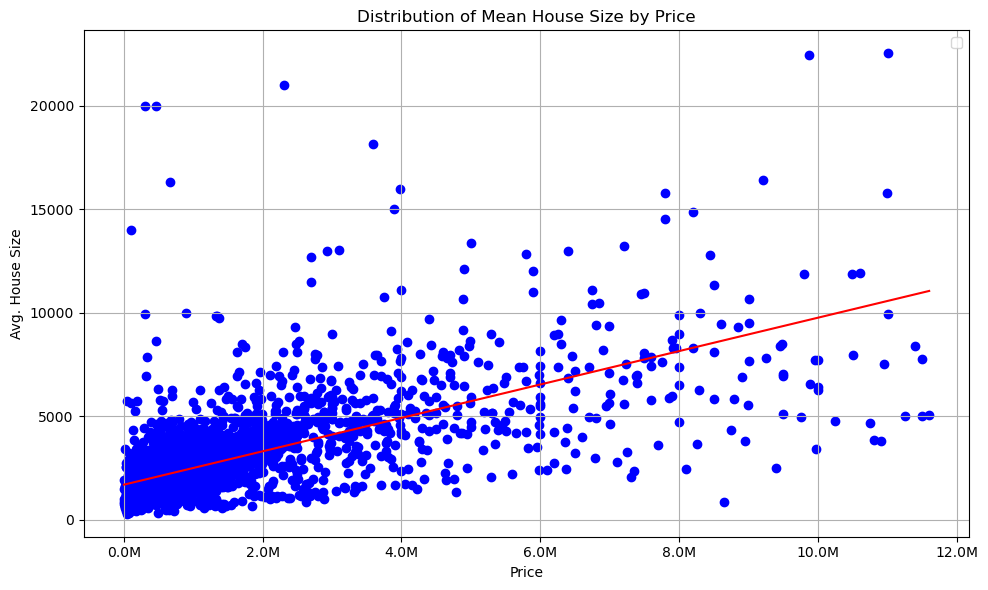

In [29]:

# Calculate mean house size for each price
price_mean_house_size = combined_df.groupby('price')['house_size'].mean().reset_index()

# Fit a linear regression line using NumPy polyfit
coefficients = np.polyfit(price_mean_house_size['price'], price_mean_house_size['house_size'], 1)
polynomial = np.poly1d(coefficients)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(price_mean_house_size['price'], price_mean_house_size['house_size'], color='b')
plt.plot(price_mean_house_size['price'], polynomial(price_mean_house_size['price']), color='r')

# Format x-axis labels in millions with 1 decimal point
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Distribution of Mean House Size by Price')
plt.xlabel('Price')
plt.ylabel('Avg. House Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Data/EDA_Images/scattermeanhousesizebyprice.png')
plt.show()

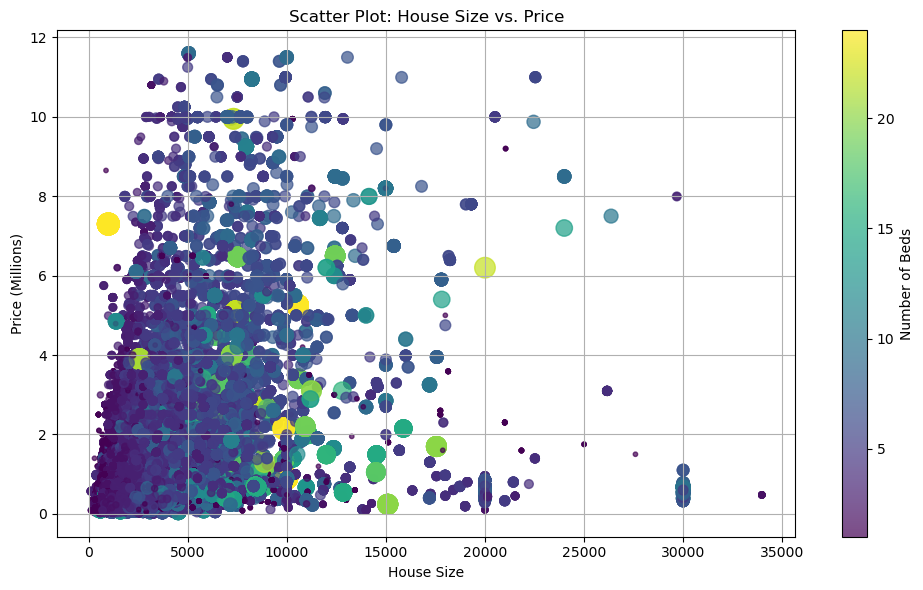

In [30]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Define colors and sizes based on the number of beds
colors = combined_df['bed']
sizes = combined_df['bed'] * 10  # Adjust the scale for bubble size

# Scatter plot with bubble size and color representing the number of beds
plt.scatter(combined_df['house_size'], combined_df['price'] / 1e6, 
            c=colors, cmap='viridis', s=sizes, alpha=0.7)

# Set x and y labels
plt.xlabel('House Size')
plt.ylabel('Price (Millions)')
plt.colorbar(label='Number of Beds')  # Add colorbar for bed count

# Add title and grid
plt.title('Scatter Plot: House Size vs. Price')
plt.grid(True)

plt.tight_layout()
plt.savefig('Data/EDA_Images/scattermeanhousesizebypricebeds.png')

# Show the plot
plt.show()

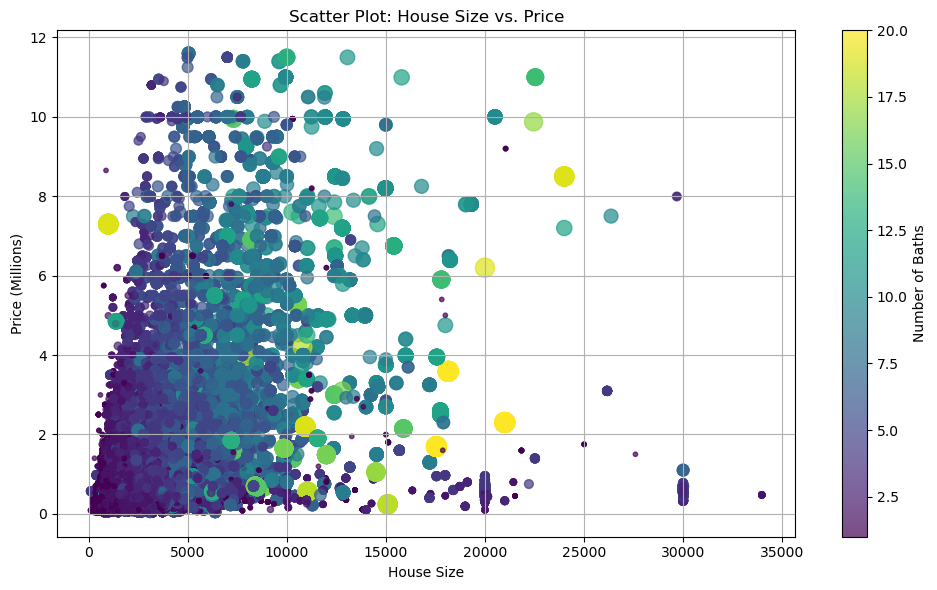

In [31]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Define colors and sizes based on the number of baths
colors = combined_df['bath']
sizes = combined_df['bath'] * 10  # Adjust the scale for bubble size

# Scatter plot with bubble size and color representing the number of baths
plt.scatter(combined_df['house_size'], combined_df['price'] / 1e6, 
            c=colors, cmap='viridis', s=sizes, alpha=0.7)

# Set x and y labels
plt.xlabel('House Size')
plt.ylabel('Price (Millions)')
plt.colorbar(label='Number of Baths')  # Add colorbar for bath count

# Add title and grid
plt.title('Scatter Plot: House Size vs. Price')
plt.grid(True)

plt.tight_layout()

plt.savefig('Data/EDA_Images/scattermeanhousesizebypricebaths.png')
# Show the plot
plt.show()